In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv('C:/Users/admin/Documents/data for csv file/Algoscale Interview------------------------------------/DS_Case_Study_beer-ratings_2020/DS_Case_Study_beer-ratings_2020/train1.csv', usecols = ['beername', 'beerstyle', 'reviewtext','reviewoverall'])
df.head()

,beername,beerstyle,reviewoverall,reviewtext
0,Chiostro,Herbed / Spiced Beer,4.0,Pours a clouded gold with a thin white head. N...
1,Bearded Pat's Barleywine,American Barleywine,3.5,12oz bottle into 8oz snifter.\t\tDeep ruby red...
2,Naughty Nellie's Ale,American Pale Ale (APA),3.5,First enjoyed at the brewpub about 2 years ago...
3,Pilsner Urquell,Czech Pilsener,2.5,First thing I noticed after pouring from green...
4,Black Sheep Ale (Special),English Pale Ale,3.0,A: pours an amber with a one finger head but o...


In [6]:
df.shape

(37500, 4)

In [7]:
df.reviewoverall.value_counts()

4.0    13868
4.5     8666
3.5     6551
3.0     3319
5.0     2671
2.5     1193
2.0      807
1.5      248
1.0      176
0.0        1
Name: reviewoverall, dtype: int64

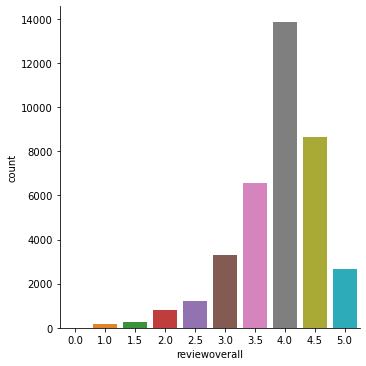

In [8]:
sns.catplot(x='reviewoverall', data = df, kind='count')

In [9]:
X = df.drop('reviewoverall', axis = 1)
X.head()

,beername,beerstyle,reviewtext
0,Chiostro,Herbed / Spiced Beer,Pours a clouded gold with a thin white head. N...
1,Bearded Pat's Barleywine,American Barleywine,12oz bottle into 8oz snifter.\t\tDeep ruby red...
2,Naughty Nellie's Ale,American Pale Ale (APA),First enjoyed at the brewpub about 2 years ago...
3,Pilsner Urquell,Czech Pilsener,First thing I noticed after pouring from green...
4,Black Sheep Ale (Special),English Pale Ale,A: pours an amber with a one finger head but o...


In [10]:
#Lable Binerization
Y = df['reviewoverall'].apply(lambda y_value:1 if y_value>2.5 else 0 )
Y

0        1
1        1
2        1
3        0
4        1
        ..
37495    1
37496    1
37497    1
37498    1
37499    1
Name: reviewoverall, Length: 37500, dtype: int64

In [ ]:
#MERGING THE COLUMN OF beername, beerstyle, reviewtext

In [11]:
df['bear_info'] = (df['beername']+df['beerstyle']+df['reviewtext']).astype(str)
df['bear_info'].head()

0    ChiostroHerbed / Spiced BeerPours a clouded go...
1    Bearded Pat's BarleywineAmerican Barleywine12o...
2    Naughty Nellie's AleAmerican Pale Ale (APA)Fir...
3    Pilsner UrquellCzech PilsenerFirst thing I not...
4    Black Sheep Ale (Special)English Pale AleA: po...
Name: bear_info, dtype: object

In [12]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [13]:
sw = set(stopwords.words('english'))
ps = PorterStemmer()

In [14]:
def clean_text(sample):
    sample = sample.lower()
    sample.replace(" \t\t", '')
    sample = re.sub('\[.*?\]','',sample)
    re.sub(r"\s+[a-zA-Z]\s+", " ", sample)
    sample = re.sub('\[.*?\]','',sample)
    sample = re.sub(r"[,@\'?\:\/\-\.$%_]", "", sample, flags=re.I)
    sample = re.sub('[''""_]','',sample)
    sample = re.sub(r"\s+"," ", sample, flags = re.I)
    sample = re.sub('\w*\d\w*','',sample)
    sample = sample.split()
    sample = [ps.stem(s) for s in sample if s not in sw]  #list compherensive
    sample = " ".join(sample)
    return sample
cleaned1 = lambda x:clean_text(x)

In [15]:
clean_text(df['bear_info'][1])

'beard pat barleywineamerican bottl snifter deep rubi red hue one finger light tan head settl thin rim along glass sharp pierc hop light hard candi background hop provid bitter arent sharp would expect mostli light candi flavor like aroma full bodi good carbon finish linger sweet flavor bit bitter sweet barleywin weird hard candi flavor seem domin bad would like littl complex'

In [16]:
df['bear_info'][1]

"Bearded Pat's BarleywineAmerican Barleywine12oz bottle into 8oz snifter.\t\tDeep ruby red hue with a one finger light tan head that settles to a thin rim along the glass.\t\tSharp piercing hops with some light hard candy in the background. \t\tThe hops provide some bitterness, but they aren't as sharp as I would have expected. Mostly a light candy flavor like in the aroma. Full bodied with good carbonation. The finish is some lingering sweet flavor with a bit of bitterness.\t\tA very sweet barleywine with a weird hard candy flavor that seemed to dominate. Not bad, but I would have liked a little more complexity."

In [17]:
X = df['bear_info'].apply(cleaned1)
print(X)

0        chiostroherb spice beerpour cloud gold thin wh...
1        beard pat barleywineamerican bottl snifter dee...
2        naughti nelli aleamerican pale ale (apa)first ...
3        pilsner urquellczech pilsenerfirst thing notic...
4        black sheep ale (special)english pale alea pou...
                               ...                        
37495    blackberri scottishstylefruit veget oz brown l...
37496    founder dirti bastardscotch ale wee heavya bri...
37497    stoudt festmã¤rzen oktoberfestsampl tap redbon...
37498    founder kb (kentucki breakfast stout)american ...
37499    founder dirti bastardscotch ale wee heavya nic...
Name: bear_info, Length: 37500, dtype: object


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [19]:
#CONVERTING THE TEXTUALDATA TO NUMERICAL DATA
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X =vectorizer.transform(X)

In [20]:
print(X)

  (0, 52042)	0.06583288457613798
  (0, 50339)	0.08444030649267009
  (0, 48273)	0.09331841591730518
  (0, 48259)	0.11742984603627683
  (0, 47493)	0.08423846561874102
  (0, 47463)	0.07075196177548107
  (0, 43463)	0.47607400333227956
  (0, 41918)	0.09009777478914953
  (0, 40950)	0.0873558746654013
  (0, 38604)	0.17524760108756635
  (0, 37813)	0.14556944713705045
  (0, 36872)	0.20703815235140904
  (0, 35086)	0.11402141507974009
  (0, 34450)	0.08777593899844359
  (0, 34065)	0.07074809750592559
  (0, 32816)	0.13748430031367254
  (0, 32157)	0.06562891742974813
  (0, 31674)	0.04776720865199267
  (0, 27587)	0.058762141321059884
  (0, 27312)	0.05062389940864838
  (0, 26633)	0.17794453642658198
  (0, 23796)	0.2537083063527948
  (0, 23720)	0.15181141714648058
  (0, 23382)	0.2012259079720131
  (0, 22284)	0.10333841070539748
  :	:
  (37499, 19936)	0.11549238083265037
  (37499, 18370)	0.059287218439215666
  (37499, 17447)	0.06031057596463996
  (37499, 15907)	0.09417683634821288
  (37499, 14749)	0.069

In [21]:
#spliting the data to train test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state =2)


In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
#TRAINING THE MODEL OF LOGISTIC REGRESION
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [24]:
#Accuracy score of training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
training_data_accuracy

0.9492

In [25]:
#Accuracy score of test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
test_data_accuracy

0.9381333333333334

In [26]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(X_test_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.16      0.77      0.26       107
           1       1.00      0.94      0.97      7393

    accuracy                           0.94      7500
   macro avg       0.58      0.85      0.61      7500
weighted avg       0.98      0.94      0.96      7500

